<a href="https://colab.research.google.com/github/bhardwajshivam/Optimizing-Order-Execution-Strategy-for-HFT/blob/main/Data_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf

def collect_stock_data(symbol, start_date, end_date):
    """
    Collects historical stock price data for a given symbol and date range.

    Parameters:
        symbol (str): The stock symbol (e.g., AAPL for Apple Inc.).
        start_date (str): The start date in the format 'YYYY-MM-DD'.
        end_date (str): The end date in the format 'YYYY-MM-DD'.

    Returns:
        pandas.DataFrame: DataFrame containing historical stock price data.
    """
    try:
        # Fetch historical data from Yahoo Finance API
        stock_data = yf.download(symbol, start=start_date, end=end_date)
        return stock_data
    except Exception as e:
        print(f"Error: Unable to fetch data for {symbol}. Error Message: {str(e)}")
        return None

# Example usage:
symbol = "AAPL"
start_date = "2013-08-01"
end_date = "2023-08-01"

stock_data = collect_stock_data(symbol, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-08-01,16.276787,16.314285,16.187857,16.309999,14.141199,206250800
2013-08-02,16.357500,16.530357,16.309286,16.519285,14.322651,274783600
2013-08-05,16.596071,16.809643,16.505358,16.766071,14.536623,318855600
2013-08-06,16.715000,16.853214,16.506071,16.616072,14.406571,334857600
2013-08-07,16.564285,16.678572,16.491785,16.606428,14.398209,298858000


In [4]:
data = stock_data[['Open','Close']]
data

,Open,Close
Date,,
2013-08-01,16.276787,16.309999
2013-08-02,16.357500,16.519285
2013-08-05,16.596071,16.766071
2013-08-06,16.715000,16.616072
2013-08-07,16.564285,16.606428
...,...,...
2023-07-25,193.330002,193.619995
2023-07-26,193.669998,194.500000
2023-07-27,196.020004,193.220001


In [5]:
import matplotlib.pyplot as plt

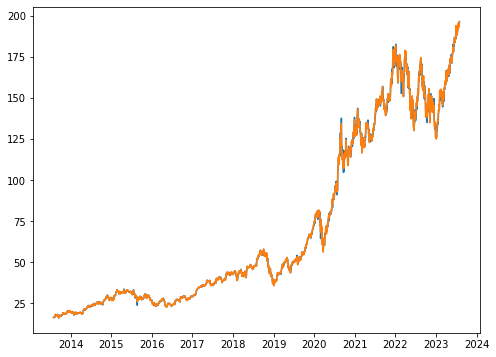

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(data['Open'])
plt.plot(data['Close'])
plt.show()